In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import yfinance as yf

In [3]:
msft = yf.Ticker("AAPL")
msft.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [4]:
from yahoo_fin.stock_info import get_data

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [5]:
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sns.set_theme()
sns.set_context("paper")

In [7]:
stock = 'AAPL'
resolution = '1d' # indise de intervalo 1 dia
end_date = datetime.now() # fecha inicial
start_date = end_date - timedelta(days=365) # dias que necesito

In [8]:
def date_format(date_h):
    return date_h.strftime('%d/%m/%Y')

In [10]:
AAPL_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
AAPL_df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200,AAPL
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100,AAPL
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600,AAPL
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332855,49386500,AAPL
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352722,41516200,AAPL


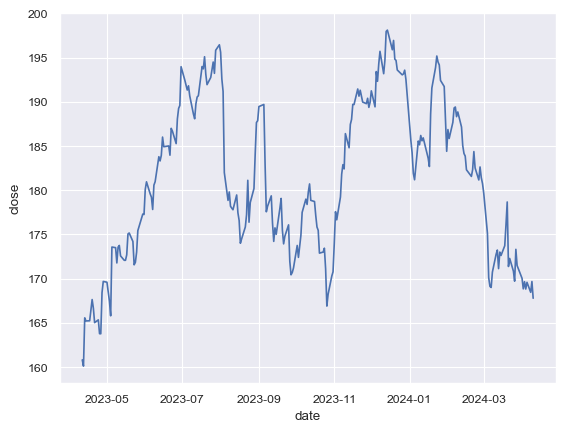

In [11]:
sns.lineplot(data=AAPL_df, x=AAPL_df.date, y=AAPL_df.close);

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = AAPL_df.date,
                                     open = AAPL_df.open, 
                                     high = AAPL_df.high,
                                     low = AAPL_df.low, 
                                     close = AAPL_df.close)
                     ])
fig.update_layout(
    title="Apple Inc. (AAPL)",
    xaxis_title="Day",
    yaxis_title="AAPL-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(AAPL_df.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#El razonamiento asociado a esta prueba de hipótesis es basado en inferencia a partir del value. 
#Si value > 0.05 no rechazamos nuestra hipótesis inicial con una significancia de 0.05

ADF Statistic: -2.546068
p-value: 0.104664


In [14]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

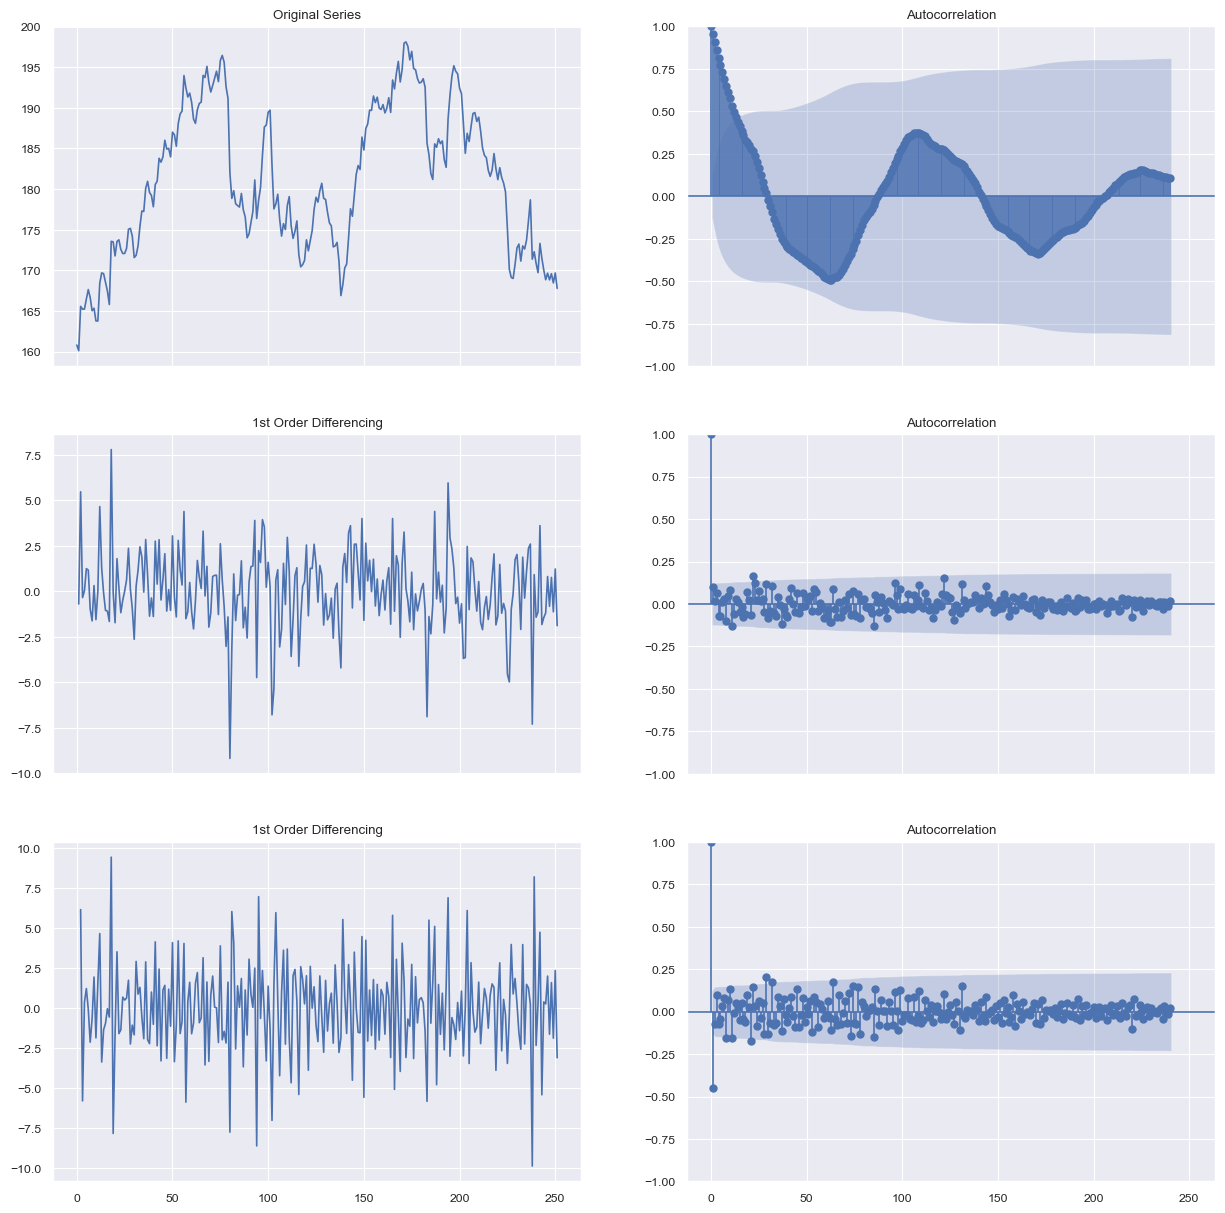

In [15]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(AAPL_df.close); axes[0, 0].set_title('Original Series')
plot_acf(AAPL_df.close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(AAPL_df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(AAPL_df.close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(AAPL_df.close.diff().diff()); axes[2, 0].set_title('1st Order Differencing')
plot_acf(AAPL_df.close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

#Criterios AIC, BIC, HQIC#

In [16]:
n_AAPL = len(AAPL_df.close); n_test = 28 # This can be changed se utiliza los ultimos 28 dias 
train_size = n_AAPL - n_test

In [17]:
train = AAPL_df.close[:train_size]
dates_train = AAPL_df.date[:train_size]
test_4w = AAPL_df.close[train_size:train_size + n_test] 
dates_4w = AAPL_df.date[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test_4w.shape)

train: (224,)
test_4w: (28,)


In [18]:
train_df = AAPL_df[["close"]][:train_size]
test_4w_df = AAPL_df[["close"]][train_size:train_size + n_test] 

In [19]:
test_4w_df.head()

,close
224,179.660004
225,175.100006
226,170.119995
227,169.119995
228,169.000000


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [21]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic # se calcula AIC 
                if tmp_aic < best_aic: #minimizo AIC
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

In [22]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
#3 datos historicos


aic: 966.08611 | order: (3, 1, 2)


In [23]:
import pmdarima as pm

model = pm.arima.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=978.536, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=977.337, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=976.552, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=976.542, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=975.724, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.330 seconds


In [24]:
from statsmodels.graphics.tsaplots import plot_predict

In [25]:
model = ARIMA(train, order=best_order)
model_fit = model.fit()

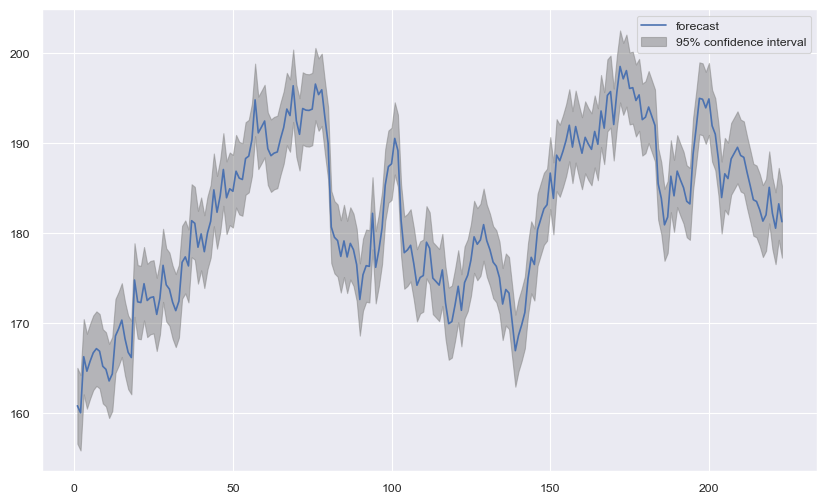

In [26]:
plt.rcParams.update({'figure.figsize': (10,6)})
fig, ax = plt.subplots();
plot_predict(model_fit, 1, ax=ax);
plt.show();

#Rolling forecast#

In [27]:
from sklearn.metrics import r2_score

In [28]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
    
    return df_acc

In [29]:
def arima_rolling(history, test):
    
    predictions = list() #se guardan las predicciones en una lista
    for t in range(len(test)): # ciclo for 1 a 28 
        model = ARIMA(history, order=best_order) # se contrulle con los mejores ordenes de arriba, con el historio que es el conjunto de entrenamiento
        model_fit = model.fit() # ajuste del modelo
        output = model_fit.forecast() # predecir en el futuro
        yhat = output[0] # se descarga la primera prediccion
        predictions.append(yhat) # se guarda la prediccion
        obs = test[t] # mi observacion como es test
        history.append(obs) # guardo mi entrenamiento historico
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [30]:
test_4wl = test_4w.tolist()
yhat_4w  = arima_rolling(train.tolist(), test_4wl)

predicted=180.200126, expected=179.660004
predicted=179.837793, expected=175.100006
predicted=174.574794, expected=170.119995
predicted=168.903639, expected=169.119995
predicted=169.276846, expected=169.000000
predicted=169.167982, expected=170.729996
predicted=170.581922, expected=172.750000
predicted=173.253944, expected=173.229996
predicted=173.527885, expected=171.130005
predicted=170.393761, expected=173.000000
predicted=172.522894, expected=172.619995
predicted=172.772092, expected=173.720001
predicted=173.506173, expected=176.080002
predicted=175.775462, expected=178.669998
predicted=179.394846, expected=171.369995
predicted=170.762191, expected=172.279999
predicted=172.128123, expected=170.850006
predicted=170.025671, expected=169.710007
predicted=170.221924, expected=173.309998
predicted=173.802602, expected=171.479996
predicted=170.452951, expected=170.029999
predicted=170.515666, expected=168.839996
predicted=168.926263, expected=169.649994
predicted=168.902574, expected=168

In [31]:
forecast_accuracy(np.array(test_4wl), np.array(yhat_4w), "week 1")

,MAE,MSE,MAPE,RMSE,R2
week 1,1.841702,6.356196,0.010605,2.52115,0.246539


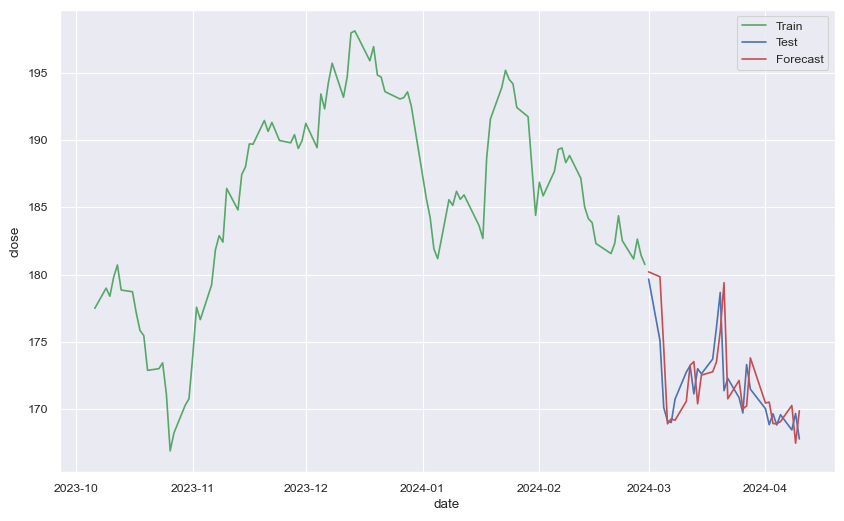

In [32]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4w, label="Forecast", color='r')
plt.show()